In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
protein = pd.read_csv('../db_tables/protein.tsv', sep= '\t')

In [3]:
mutation = pd.read_csv('../db_tables/mutation_new.tsv.gz', sep= '\t', compression= 'gzip')

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [110]:
mutation.columns

Index(['id_mutation', 'snp_id', 'chromosome', 'start_genomic', 'end_genomic',
       'start_aa', 'end_aa', 'notation_cds', 'notation_aa', 'id_protein',
       'id_consequence'],
      dtype='object')

In [4]:
mutation.drop(columns= ['snp_id', 'chromosome', 'start_genomic', 'end_genomic', 'notation_cds'], inplace= True)

In [5]:
protein.head()

,id_protein,uniprot_acc,uniprot_status,length,uniprot_name,hgnc_id,gene_id,gene_name,disorder_content,gene_name_synonyms,protein_names,sequence
0,1,P35637,Reviewed,526,FUS_HUMAN,4010,2521,FUS,0.797,TLS,RNA-binding protein FUS (75 kDa DNA-pairing pr...,MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTD...
1,2,Q06787,Reviewed,632,FMR1_HUMAN,3775,2332,FMR1,0.340,NaN,Synaptic functional regulator FMR1 (Fragile X ...,MEELVVEVRGSNGAFYKAFVKDVHEDSITVAFENNWQPDRQIPFHD...
2,3,Q92804,Reviewed,592,RBP56_HUMAN,11547,8148,TAF15,0.828,"RBP56,TAF2N",TATA-binding protein-associated factor 2N (68 ...,MSDSGSYGQSGGEQQSYSTYGNPGSQGYGQASQSYSGYGQTTDSSY...
3,4,Q13148,Reviewed,414,TADBP_HUMAN,11571,23435,TARDBP,0.184,TDP43,TAR DNA-binding protein 43 (TDP-43),MSEYIRVTEDENDEPIEIPSEDDGTVLLSTVTAQFPGACGLRYRNP...
4,5,Q01844,Reviewed,656,EWS_HUMAN,3508,2130,EWSR1,0.649,EWS,RNA-binding protein EWS (EWS oncogene) (Ewing ...,MASTDYSTYSQAAAQQGYSAYTAQPTQGYAQTTQAYGQQSYGTYGQ...


In [6]:
protein = protein[['id_protein', 'uniprot_name', 'length', 'sequence']].sort_values('length')

In [7]:
# List of amino acids
letters = list(set(protein[protein.uniprot_name == 'TITIN_HUMAN'].sequence[5105]))
letters.sort()
letters.append("*") # stop

In [9]:
#pd.DataFrame(index = letters, columns= letters)

In [10]:
mutation.head()

,id_mutation,start_aa,end_aa,notation_aa,id_protein,id_consequence
0,1,442,442,p.Y442=,3155,2
1,2,480,480,p.S480=,3155,2
2,3,500,500,p.A500=,3155,2
3,4,503,503,p.S503=,3155,2
4,5,69,69,p.P69=,3155,2


In [11]:
# Get only point mutations (99.5% of the total)
mutation_point = mutation[mutation.start_aa == mutation.end_aa]

In [12]:
mutation_point.notation_aa = mutation_point.notation_aa.str.strip('.p')

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
mutation_point.notation_aa.sample(20)

999641           P586H
118573          V1532L
377966          T2044=
1354924         E2127K
1360117          N345T
1268529          I456M
929262           I301T
1460684          E343K
189258            S55L
1402801          G221D
1445085          K569R
1069633          E195K
1583401          G659*
576492       M62Nfs*55
1496733          A270V
970555          K2038E
632649           D505N
585335     P1409Mfs*13
388832          L1032=
336188           R307=
Name: notation_aa, dtype: object

In [14]:
mutation_point["aux"] = mutation_point.notation_aa.map(lambda x: re.findall('[A-Z\*]', x))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
mutation_point["aux_len"] = [ len(i) for i in mutation_point.aux ]

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
ix = mutation_point[mutation_point.aux_len > 2].index

In [17]:
mutation_point.drop(index= ix, inplace= True) # 1603415

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
mutation_point[mutation_point.aux_len > 2] # Ok

,id_mutation,start_aa,end_aa,notation_aa,id_protein,id_consequence,aux,aux_len


In [20]:
mutation_point["from_aa"] = mutation_point.aux.str[0].copy()
mutation_point["to_aa"] = mutation_point.aux.str[1].copy()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
mutation_point

,id_mutation,start_aa,end_aa,notation_aa,id_protein,id_consequence,aux,aux_len,from_aa,to_aa
0,1,442,442,Y442=,3155,2,[Y],1,Y,NaN
1,2,480,480,S480=,3155,2,[S],1,S,NaN
2,3,500,500,A500=,3155,2,[A],1,A,NaN
3,4,503,503,S503=,3155,2,[S],1,S,NaN
4,5,69,69,P69=,3155,2,[P],1,P,NaN
...,...,...,...,...,...,...,...,...,...,...
1660054,1660055,337,337,A337S,4349,1,"[A, S]",2,A,S
1660055,1660056,26,26,E26K,4361,1,"[E, K]",2,E,K
1660056,1660057,215,215,S215N,4361,1,"[S, N]",2,S,N
1660057,1660058,400,400,Y400N,4362,1,"[Y, N]",2,Y,N


In [22]:
mutation_point.id_consequence.value_counts()

1     1105104
2      388665
3       85054
4       18115
5        5610
8         840
6          13
10         12
9           2
Name: id_consequence, dtype: int64

In [23]:
mutation_point[mutation_point.notation_aa.str.endswith("=")].id_consequence.value_counts()

2    388665
Name: id_consequence, dtype: int64

In [131]:
# Synonyms
#mutation_point[mutation_point.id_consequence == 2].to_aa = mutation_point[mutation_point.id_consequence == 2].from_aa.copy()

In [132]:
'''for ix in mutation_point.index:
    if mutation_point.id_consequence[ix] == 2: # synonym
        mutation_point.to_aa[ix] == syn_aa[ix]'''

'for ix in mutation_point.index:\n    if mutation_point.id_consequence[ix] == 2: # synonym\n        mutation_point.to_aa[ix] == syn_aa[ix]'

In [24]:
mutation_point.to_aa = mutation_point.apply(lambda x: x.from_aa if x.id_consequence == 2 else x.to_aa, axis=1)

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
mutation_point

,id_mutation,start_aa,end_aa,notation_aa,id_protein,id_consequence,aux,aux_len,from_aa,to_aa
0,1,442,442,Y442=,3155,2,[Y],1,Y,Y
1,2,480,480,S480=,3155,2,[S],1,S,S
2,3,500,500,A500=,3155,2,[A],1,A,A
3,4,503,503,S503=,3155,2,[S],1,S,S
4,5,69,69,P69=,3155,2,[P],1,P,P
...,...,...,...,...,...,...,...,...,...,...
1660054,1660055,337,337,A337S,4349,1,"[A, S]",2,A,S
1660055,1660056,26,26,E26K,4361,1,"[E, K]",2,E,K
1660056,1660057,215,215,S215N,4361,1,"[S, N]",2,S,N
1660057,1660058,400,400,Y400N,4362,1,"[Y, N]",2,Y,N


In [26]:
mutation_point.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603415 entries, 0 to 1660058
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id_mutation     1603415 non-null  int64 
 1   start_aa        1603415 non-null  int64 
 2   end_aa          1603415 non-null  int64 
 3   notation_aa     1603415 non-null  object
 4   id_protein      1603415 non-null  int64 
 5   id_consequence  1603415 non-null  int64 
 6   aux             1603415 non-null  object
 7   aux_len         1603415 non-null  int64 
 8   from_aa         1603415 non-null  object
 9   to_aa           1579042 non-null  object
dtypes: int64(6), object(4)
memory usage: 134.6+ MB


In [27]:
mutation_point[mutation_point.to_aa.isnull()]

,id_mutation,start_aa,end_aa,notation_aa,id_protein,id_consequence,aux,aux_len,from_aa,to_aa
59943,59944,130,130,F130del,3155,5,[F],1,F,NaN
59944,59945,1226,1226,N1226del,1628,5,[N],1,N,NaN
59947,59948,404,404,E404del,4144,5,[E],1,E,NaN
59948,59949,404,404,E404del,4272,5,[E],1,E,NaN
59951,59952,799,799,L799del,3636,5,[L],1,L,NaN
...,...,...,...,...,...,...,...,...,...,...
559215,559216,372,372,V372du,3643,8,[V],1,V,NaN
559216,559217,492,492,T492du,566,8,[T],1,T,NaN
559217,559218,543,543,I543du,979,8,[I],1,I,NaN
559218,559219,233,233,Q233du,3425,8,[Q],1,Q,NaN


In [28]:
# Drop deletions, duplications, fs, delins and others non point mutations
mutation_point[mutation_point.to_aa.isnull()].id_consequence.value_counts()

4    17922
5     5609
8      840
1        2
Name: id_consequence, dtype: int64

In [29]:
mutation_point.to_aa.isnull().sum() /1660000 * 100

1.4682530120481927

In [30]:
mutation_point = mutation_point[mutation_point.to_aa.notnull()] # 1579042

In [31]:
mutation_point.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1579042 entries, 0 to 1660058
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id_mutation     1579042 non-null  int64 
 1   start_aa        1579042 non-null  int64 
 2   end_aa          1579042 non-null  int64 
 3   notation_aa     1579042 non-null  object
 4   id_protein      1579042 non-null  int64 
 5   id_consequence  1579042 non-null  int64 
 6   aux             1579042 non-null  object
 7   aux_len         1579042 non-null  int64 
 8   from_aa         1579042 non-null  object
 9   to_aa           1579042 non-null  object
dtypes: int64(6), object(4)
memory usage: 132.5+ MB


In [177]:
# subs_mtx = pd.pivot_table(data= mutation_point, index= "from_aa", columns= "to_aa", aggfunc= "size")
# subs_mtx

In [179]:
pd.pivot_table(data= mutation_point, index= "from_aa", columns= "to_aa", aggfunc= "size")

to_aa,*,A,C,D,E,F,G,H,I,K,...,N,P,Q,R,S,T,V,W,X,Y
from_aa,,,,,,,,,,,,,,,,,,,,,
*,422.0,NaN,16.0,NaN,6.0,1.0,8.0,NaN,NaN,4.0,...,NaN,NaN,15.0,20.0,9.0,NaN,NaN,13.0,1.0,13.0
A,37.0,33354.0,6.0,5644.0,3119.0,32.0,3905.0,1.0,21.0,12.0,...,14.0,3892.0,6.0,9.0,12147.0,30624.0,31231.0,NaN,NaN,4.0
C,1927.0,5.0,5770.0,1.0,NaN,2970.0,858.0,5.0,1.0,NaN,...,2.0,3.0,1.0,2298.0,1956.0,2.0,1.0,821.0,NaN,4594.0
D,265.0,1794.0,10.0,13042.0,7149.0,18.0,8280.0,7954.0,10.0,1.0,...,26508.0,4.0,1.0,6.0,15.0,5.0,3722.0,NaN,NaN,12207.0
E,21091.0,2897.0,NaN,17338.0,14782.0,NaN,7743.0,1.0,18.0,46622.0,...,4.0,9.0,14613.0,20.0,10.0,15.0,3989.0,NaN,NaN,2.0
F,93.0,3.0,2551.0,2.0,1.0,16126.0,4.0,3.0,1667.0,3.0,...,2.0,3.0,NaN,2.0,2783.0,NaN,2493.0,1.0,NaN,1314.0
G,4874.0,4700.0,8217.0,11137.0,14191.0,68.0,26893.0,6.0,33.0,464.0,...,192.0,10.0,5.0,18099.0,11776.0,14.0,13099.0,5901.0,NaN,14.0
H,11.0,4.0,3.0,1437.0,1.0,4.0,1.0,7165.0,4.0,NaN,...,4175.0,1474.0,3403.0,5025.0,3.0,3.0,1.0,NaN,NaN,9532.0
I,130.0,13.0,1.0,5.0,1.0,2729.0,3.0,7.0,20913.0,501.0,...,2231.0,3.0,NaN,323.0,1726.0,6527.0,9882.0,NaN,1.0,6.0


In [32]:
control = mutation_point.from_aa + mutation_point.to_aa

In [33]:
control.value_counts()

LL    55932
EK    46622
SS    37381
PP    33827
AA    33354
      ...  
DK        1
EH        1
KF        1
NC        1
YR        1
Length: 396, dtype: int64

In [34]:
def generate_matrix(df, title, figsize= (10,8), cmap= 'YlOrBr'):
    subs_mtx = pd.pivot_table(data= df, index= "from_aa", columns= "to_aa", aggfunc= "size")
    plt.subplots(figsize= figsize)
    sns.heatmap(subs_mtx, cmap= cmap)
    plt.title(title, fontsize= 20, fontweight= 'bold')
    plt.show()

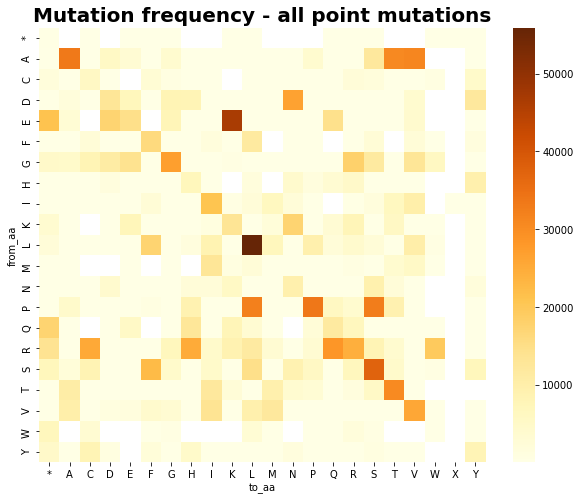

In [40]:
generate_matrix(mutation_point, title= "Mutation frequency - all point mutations") # cmap= 'Wistia'

### Not consider synonyms

In [166]:
mutation_point.id_consequence.value_counts(normalize= True)*100

1     69.985599
2     24.613975
3      5.386431
4      0.012223
6      0.000823
10     0.000760
9      0.000127
5      0.000063
Name: id_consequence, dtype: float64

In [37]:
# to delete synonyms is around 25% of mutations
mutation_point_nosyn = mutation_point[mutation_point.id_consequence != 2]

In [38]:
mutation_point_nosyn.id_consequence.value_counts(normalize= True)*100

1     92.836303
3      7.145131
4      0.016213
6      0.001092
10     0.001008
9      0.000168
5      0.000084
Name: id_consequence, dtype: float64

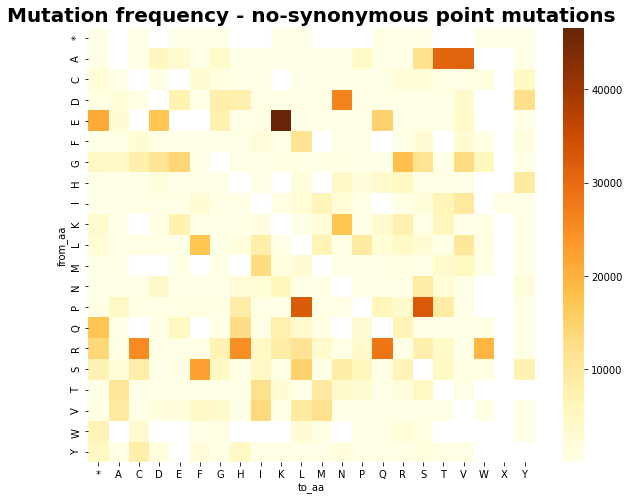

In [41]:
generate_matrix(mutation_point_nosyn, "Mutation frequency - no-synonymous point mutations")